In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [30]:
# Load dataset
df = pd.read_excel("Nlp.xlsx")
df

,TweetId,Topic,Target,Description
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TweetId      74682 non-null  int64 
 1   Topic        74682 non-null  object
 2   Target       74682 non-null  object
 3   Description  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
# Drop rows with missing 'Description'
df.dropna(subset=['Description'], inplace=True)

In [23]:
# Convert 'Description' to string
df['Description'] = df['Description'].astype(str)

In [24]:
# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except Exception as e:
        return np.nan

df['sentiment_score'] = df['Description'].apply(analyze_sentiment)

In [25]:
# Drop rows where sentiment analysis failed
df.dropna(subset=['sentiment_score'], inplace=True)

In [26]:
# Categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

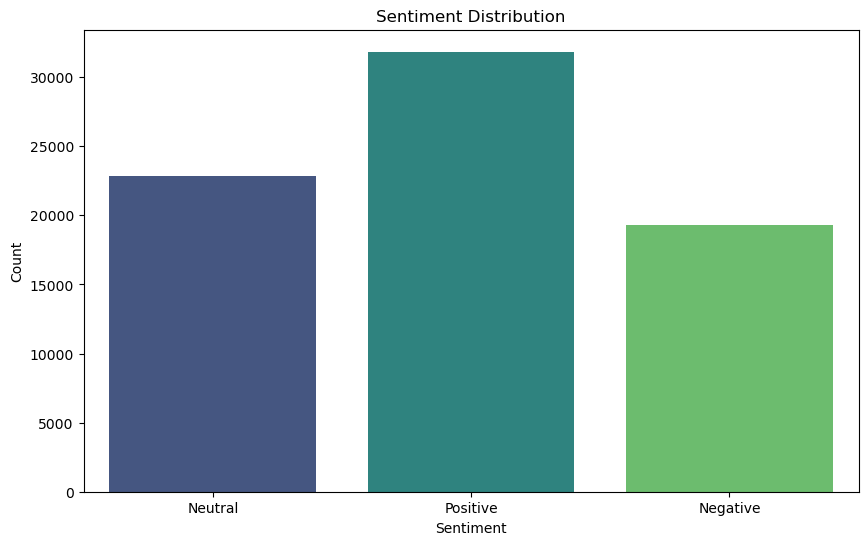

In [27]:
# Visualization

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

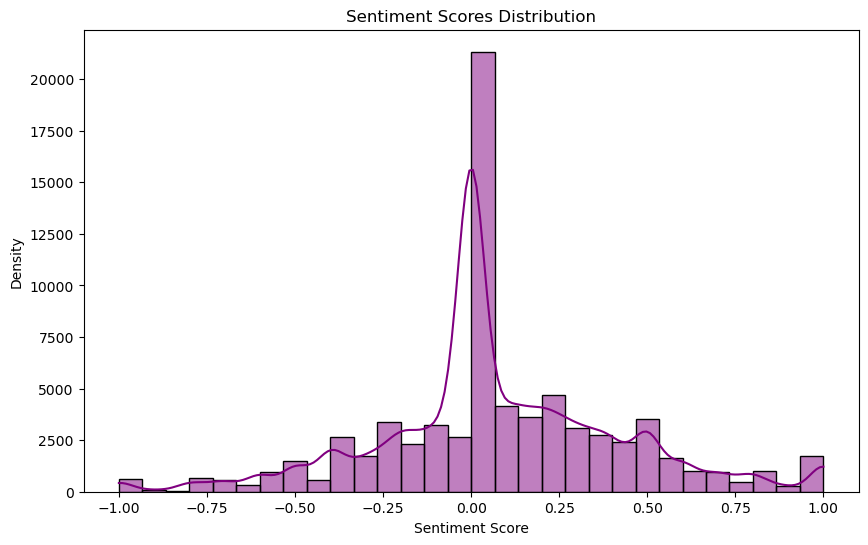

In [28]:
# Sentiment scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

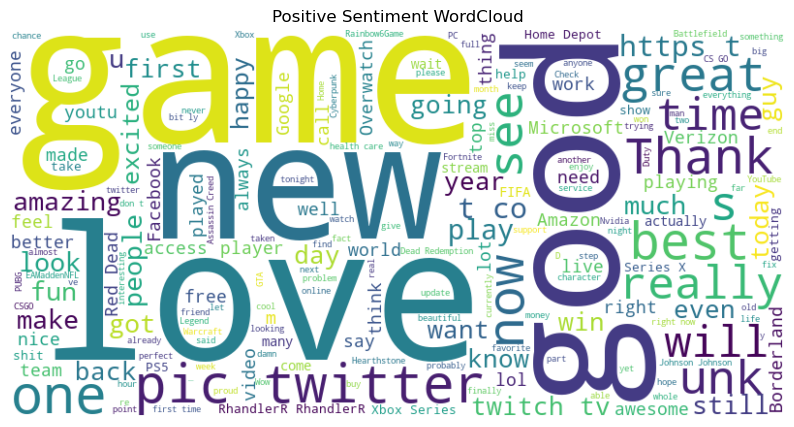

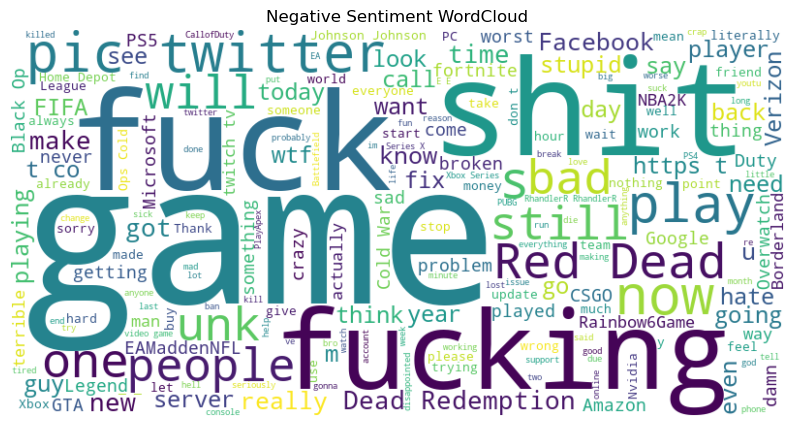

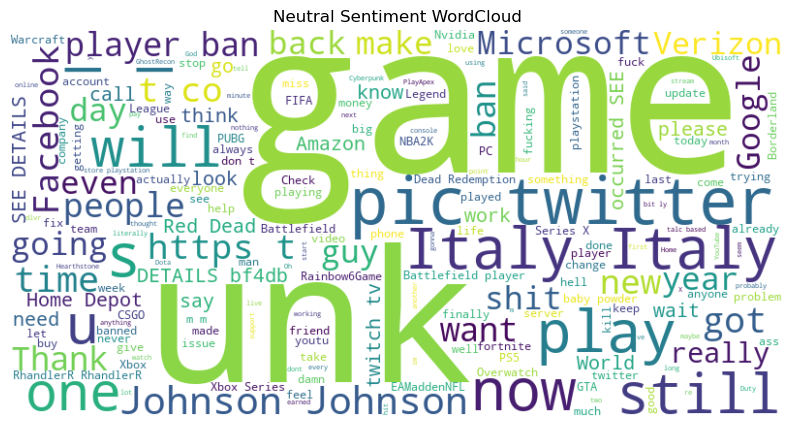

In [29]:
# WordCloud for each sentiment category
def generate_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_text = df[df['sentiment'] == 'Positive']['Description']
negative_text = df[df['sentiment'] == 'Negative']['Description']
neutral_text = df[df['sentiment'] == 'Neutral']['Description']

generate_wordcloud(positive_text, 'Positive Sentiment WordCloud')
generate_wordcloud(negative_text, 'Negative Sentiment WordCloud')
generate_wordcloud(neutral_text, 'Neutral Sentiment WordCloud')